In [1]:
import pandas as pd
from datetime import datetime

## Creating a Reddit API Client with PRAW

In [22]:
import praw

#User Agent Definition
user_agent = "nvda 1.0 by u/Interesting-Thing302"

#Reddit API Client Initialization
reddit=praw.Reddit(
    client_id='-Eii7F5tVZEYTB9_xuwUUA',
    client_secret='lYSjyUDDlGRpRwwG-gaLZ8Fj05BLXA',
    user_agent=user_agent
)

## Extracting Reddit Comments Related to TSMC

In [ ]:
#Search Query and Date Range Setup
search_query = "TSMC"

#Lists to Store Comment Data
start_date=datetime(2023,1,1)
end_date=datetime(2024,6,26)

comments_text=[]
comments_created_time=[]
comments_scores=[]

#Searching and Collecting Comments
for submission in reddit.subreddit('all').search(search_query, limit=None):
    
    submission.comments.replace_more(limit=None)
    
    for comment in submission.comments.list():
        
        comment_time=datetime.utcfromtimestamp(comment.created_utc)
        
        if start_date<=comment_time<=end_date:
            comments_text.append(comment.body)
            comments_created_time.append(comment_time.strftime('%Y-%m-%d'))
            comments_scores.append(comment.score)

tsmc_reddit_df=pd.DataFrame({
    'comment':comments_text,
    'created_time':comments_created_time,
    'score':comments_scores
})    

In [ ]:
tsmc_reddit_df

In [5]:
#Check the dataframe
tsmc_reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21775 entries, 0 to 21774
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment       21775 non-null  object
 1   created_time  21775 non-null  object
 2   score         21775 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 510.5+ KB


## Sorting Reddit Comments DataFrame by Creation Time

In [10]:
#Change the created time to datetime format
tsmc_reddit_df['created_time']=pd.to_datetime(tsmc_reddit_df['created_time'])

In [11]:
#Sortting the data by created time
tsmc_reddit_df=tsmc_reddit_df.sort_values(by='created_time')

In [12]:
#Resetting the Index
tsmc_reddit_df.reset_index(drop=True, inplace=True)

In [13]:
tsmc_reddit_df

,comment,created_time,score
0,There are much bigger forces at play. Global r...,2023-01-01,81
1,I second his recommendation. I sold a guy a 39...,2023-01-01,1
2,I had a 650w too with Ryzen 5800x and rx6800xt...,2023-01-01,3
3,\>Implying AMD isn't just as shit in their own...,2023-01-01,-9
4,Not sure I'd recommend the 6700 as it's barely...,2023-01-01,-1
...,...,...,...
21770,"Die Fachkräfte werden sie finden, dafür haben ...",2024-06-25,1
21771,intel foundry,2024-06-25,1
21772,"Was das angeht, kann ich nicht viel zu sagen. ...",2024-06-25,1
21773,In den Werken außerhalb Taiwans werden keine ...,2024-06-25,1


In [15]:
#Save tsmc_reddit discussion comment into csv files
tsmc_reddit_df.to_csv("tsmc_reddit_df.csv", index=False)

In [3]:
tsmc_comment_df=pd.read_csv("tsmc_reddit_df.csv")

In [4]:
tsmc_comment_df

,comment,created_time,score
0,There are much bigger forces at play. Global r...,2023-01-01,81
1,I second his recommendation. I sold a guy a 39...,2023-01-01,1
2,I had a 650w too with Ryzen 5800x and rx6800xt...,2023-01-01,3
3,\>Implying AMD isn't just as shit in their own...,2023-01-01,-9
4,Not sure I'd recommend the 6700 as it's barely...,2023-01-01,-1
...,...,...,...
21770,"Die Fachkräfte werden sie finden, dafür haben ...",2024-06-25,1
21771,intel foundry,2024-06-25,1
21772,"Was das angeht, kann ich nicht viel zu sagen. ...",2024-06-25,1
21773,In den Werken außerhalb Taiwans werden keine ...,2024-06-25,1


# Sentiment Analysis on Reddit Disscussion on TSMC

In [5]:
from vaderSentiment.vaderSentiment  import SentimentIntensityAnalyzer

analyzer=SentimentIntensityAnalyzer()

def classify_sentiment(score):
    if score >= 0.5:
        return 'positive'
    elif score <= -0.5:
        return 'negative'
    else: 
        return 'neutral'

In [6]:
#Apply sentiment analysis

tsmc_comment_df['sentiment']=tsmc_comment_df['comment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

tsmc_comment_df['sentiment']=tsmc_comment_df['sentiment'].apply(classify_sentiment)

In [7]:
tsmc_comment_df

,comment,created_time,score,sentiment
0,There are much bigger forces at play. Global r...,2023-01-01,81,neutral
1,I second his recommendation. I sold a guy a 39...,2023-01-01,1,negative
2,I had a 650w too with Ryzen 5800x and rx6800xt...,2023-01-01,3,neutral
3,\>Implying AMD isn't just as shit in their own...,2023-01-01,-9,neutral
4,Not sure I'd recommend the 6700 as it's barely...,2023-01-01,-1,neutral
...,...,...,...,...
21770,"Die Fachkräfte werden sie finden, dafür haben ...",2024-06-25,1,negative
21771,intel foundry,2024-06-25,1,neutral
21772,"Was das angeht, kann ich nicht viel zu sagen. ...",2024-06-25,1,negative
21773,In den Werken außerhalb Taiwans werden keine ...,2024-06-25,1,negative


In [27]:
tsmc_comment_df.to_csv('tsmc_comment.csv', index=False)

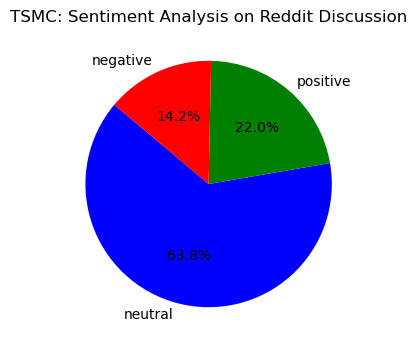

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = tsmc_comment_df['sentiment'].value_counts()

colors=['green', 'blue', 'red']
colors_map={'positive':'green', 'neutral':'blue', 'negative':'red'}
colors_pie=[colors_map[sentiment] for sentiment in sentiment_counts.index]

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_pie)
plt.title('TSMC: Sentiment Analysis on Reddit Discussion')
plt.show()

## Aggregating Sentiment Scores by Date

In [9]:
#Aggregrate sentiment scores by date
tsmc_sentiment=tsmc_comment_df.groupby('created_time').agg({
    'score':'sum',
    'sentiment':lambda x: x.value_counts().idxmax()
}).reset_index()

In [10]:
#Rename the date colmun to match Stock DateFrame
tsmc_sentiment['created_time']=pd.to_datetime(tsmc_sentiment['created_time'])
tsmc_sentiment.rename(columns={'created_time':'Date'},inplace=True)

In [11]:
tsmc_sentiment

,Date,score,sentiment
0,2023-01-01,1486,neutral
1,2023-01-02,155,positive
2,2023-01-03,6,positive
3,2023-01-04,1,neutral
4,2023-01-12,1,neutral
...,...,...,...
311,2024-06-21,140,neutral
312,2024-06-22,3,positive
313,2024-06-23,8083,positive
314,2024-06-24,6547,neutral


In [12]:
#Save TSMC sentiment to CSV
tsmc_sentiment.to_csv("tsmc_sentiment.csv", index=False)